In [1]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [2]:
x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [3]:
## Sorting along rows
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [4]:
np.sort(X, axis=0) #sort each colum of x

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [5]:
np.sort(X, axis=1) #sort each row of X

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [6]:
# Partial Sorts: Partioning
x = np.array([7, 2, 3, 1, 6, 5, 5])
np.partition(x, 3)

array([1, 2, 3, 5, 5, 6, 7])

In [7]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [10]:
# k-Nearest Neighbors
X =rand.rand(10, 2)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #plot styling

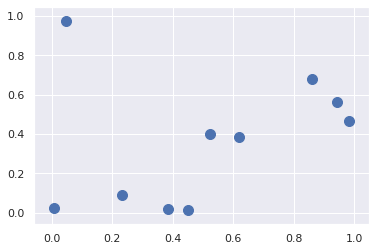

In [12]:
plt.scatter(X[:, 0], X[:, 1], s=100)

In [13]:
# For each pair of points compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [15]:
#square the coordinate diffrences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [18]:
# Sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape


(10, 10)

In [19]:
dist_sq.diagonal()

array([5.81808118e-04, 4.35277241e-01, 9.50377495e-01, 6.23920229e-02,
       5.28678431e-01, 1.18461057e+00, 1.20231585e+00, 2.03125535e-01,
       1.20503776e+00, 1.48800802e-01])

In [20]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]
 [0 3 9 7 1 4 2 5 6 8]]


In [21]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

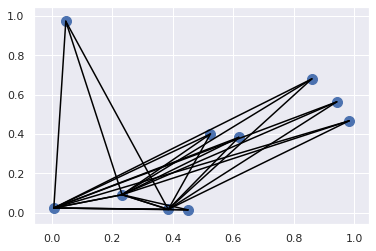

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen
        plt.plot(*zip(X[j], X[i]), color='black')